# Convolutional Neural Networks using Keras	

## Machine Learning Methods 


### Module 7: Neural Networks 
### Part 3: Convolutional Neural Networks using Keras	

### Instructor: Farhad Pourkamali

### Overview
<hr style="border:2px solid gray">

* Convolutional Neural Networks (CNNs) capture **spatial features** from images, focusing on pixel arrangements and their relationships

* Main Types of Layers:

    * Convolutional Layer: Extracts features using filters
    * Pooling Layer: Reduces the dimensionality and highlights dominant features
    * Fully-connected (FC) or Dense Layer: Combines features for final classification or regression
    
* Advantages over Multilayer Perceptrons (MLPs):

    * Fewer parameters to learn due to shared weights in filters
    * Translation invariance: Treats all patches of the image uniformly, regardless of their position
    * Locality: Uses only small neighborhoods of pixels to compute hidden representations, making it computationally efficient
    
* Example: The input is a two-dimensional tensor with a height of 3 and width of 3. The filter or kernel has a height of 2 and width of 2 (credit: Dive into Deep Learning, https://d2l.ai/)

<img src="https://d2l.ai/_images/correlation.svg">


* A **convolution layer** is made up of a large number of convolution filters or kernels 

* A convolution filter relies on a simple operation, called a convolution

    * repeatedly multiplying matrix elements and then adding the results
    * consider a very simple example of a 4x3 image
$$
\text{image}=\begin{bmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33} \\
    a_{41} & a_{42} & a_{43} \\
\end{bmatrix}
$$
* consider a 2x2 filter of the form
$$
\text{filter}=\begin{bmatrix}
    f_{11} & f_{12} \\
    f_{21} & f_{22} \\
\end{bmatrix}
$$

* When we convolve the image with the filter, we get the result
$$
\begin{bmatrix}
  a_{11}f_{11}+a_{12}f_{12}+a_{21}f_{21}+a_{22}f_{22}   &  a_{12}f_{11}+a_{13}f_{12}+a_{22}f_{21}+a_{23}f_{22}\\
   a_{21}f_{11}+a_{22}f_{12}+a_{31}f_{21}+a_{32}f_{22}  &  a_{22}f_{11}+a_{23}f_{12}+a_{32}f_{21}+a_{33}f_{22}\\
    a_{31}f_{11}+a_{32}f_{12}+a_{41}f_{21}+a_{42}f_{22} &  a_{32}f_{11}+a_{33}f_{12}+a_{42}f_{21}+a_{43}f_{22}\\
\end{bmatrix}
$$

* If the image size is $n_h\times n_w$ and the size of the convolution filter is $k_h\times k_w$, we get 

$$\big(n_h - k_h + 1 \big)\times \big(n_w - k_w + 1 \big)$$

* Thus, the output size is slightly smaller than the input size

* "Padding" refers to the technique of adding extra rows and columns of zeros around the input data before applying a convolution operation
    * control the spatial dimensions of the output feature maps
    * preserve information at the edges of the input
    
* If we add a total of $p_h$ rows of padding and $p_w$ columns of padding, the output shape will be

$$\big(n_h - k_h + p_h + 1 \big)\times \big(n_w - k_w + p_w + 1 \big)$$

* Hence, we can give the input and output the same height and width by choosing 

$$p_h = k_h - 1, \; p_w = k_w - 1$$

* This is why CNNs commonly use convolution filters with odd height and width values
    * padding with the same number of rows on top and bottom, and the same number of columns on left and right
    
* "Stride" controls how much the filter shifts (horizontally and vertically) between successive applications to generate the output feature map
    * That is, the number of rows and columns traversed per slide 
    * A stride of 1 means that the filter moves one pixel at a time (no skipping)
    * A stride greater than 1 causes the filter to skip pixels
    
$$\lfloor\big(n_h-k_h+p_h+s_h\big)/s_h\rfloor \times \lfloor\big(n_w-k_w+p_w+s_w\big)/s_w\rfloor$$

* Example: strides of 3 and 2 for height and width (credit: Dive into Deep Learning, https://d2l.ai/)

<img src=https://d2l.ai/_images/conv-stride.svg>

### Multiple input channels
<hr style="border:2px solid gray">

* When the input data or image contains multiple channels, we need to construct a convolution filter with the same number of channels 

    * For example, consider $C$ channels for the previous case study, $i=1,2,\ldots,C$
 
    \begin{equation}\text{channel $i$ of image} =\begin{bmatrix}
    a_{11}^{(i)} & a_{12}^{(i)} & a_{13}^{(i)} \\
    a_{21}^{(i)} & a_{22}^{(i)} & a_{23}^{(i)} \\
    a_{31}^{(i)} & a_{32}^{(i)} & a_{33}^{(i)} \\
    a_{41}^{(i)} & a_{42}^{(i)} & a_{43}^{(i)} \\
\end{bmatrix}\end{equation}

\begin{equation}\text{channel $i$ of filter}=\begin{bmatrix}
    f_{11}^{(i)} & f_{12}^{(i)} \\
    f_{21}^{(i)} & f_{22}^{(i)} \\
\end{bmatrix}\end{equation}

* Final result: two-dimensional tensor

\begin{equation}\begin{bmatrix}
  \sum_{i=1}^C [a_{11}^{(i)}f_{11}^{(i)}+a_{12}^{(i)}f_{12}^{(i)}+a_{21}^{(i)}f_{21}^{(i)}+a_{22}^{(i)}f_{22}^{(i)}]   &  \sum_{i=1}^C [a_{12}^{(i)}f_{11}^{(i)}+a_{13}^{(i)}f_{12}^{(i)}+a_{22}^{(i)}f_{21}^{(i)}+a_{23}^{(i)}f_{22}^{(i)}]\\
\sum_{i=1}^C   [a_{21}^{(i)}f_{11}^{(i)}+a_{22}^{(i)}f_{12}^{(i)}+a_{31}^{(i)}f_{21}^{(i)}+a_{32}^{(i)}f_{22}^{(i)}]  & \sum_{i=1}^C [a_{22}^{(i)}f_{11}^{(i)}+a_{23}^{(i)}f_{12}^{(i)}+a_{32}^{(i)}f_{21}^{(i)}+a_{33}^{(i)}f_{22}^{(i)}]\\
    \sum_{i=1}^C [a_{31}^{(i)}f_{11}^{(i)}+a_{32}^{(i)}f_{12}^{(i)}+a_{41}^{(i)}f_{21}^{(i)}+a_{42}^{(i)}f_{22}^{(i)}] &  \sum_{i=1}^C [a_{32}^{(i)}f_{11}^{(i)}+a_{33}^{(i)}f_{12}^{(i)}+a_{42}^{(i)}f_{21}^{(i)}+a_{43}^{(i)}f_{22}^{(i)}]\\
\end{bmatrix}\end{equation}

* Example (credit: Dive into Deep Learning, https://d2l.ai/)

<img src="https://d2l.ai/_images/conv-multi-in.svg">

### Multiple output channels
<hr style="border:2px solid gray">

* In a convolution layer, you typically have multiple filters. Each filter is a small, learnable tensor that slides or convolves over the input data

* The number of filters you specify in a layer determines the number of output channels

* Denote by $C_i$ and $C_o$ the number of input and output channels

    * Let $k_h$ and $k_w$ be the height and width of the filter
    * To get an output with multiple channels, we can create a filter tensor of shape $k_h\times k_w \times C_i$ for every output channel 
    * Hence, we concatenate them on the output channel dimension, so that the shape of the convolution filter is $k_h\times k_w \times C_i \times C_o$


* Example (credit: Dive into Deep Learning, https://d2l.ai/)

<img src="https://d2l.ai/_images/conv-1x1.svg">

### Maximum pooling
<hr style="border:2px solid gray">

* The primary purpose of max pooling is to downsample the spatial dimensions of feature maps

* This reduction in spatial resolution helps control the computational complexity of the network 

* Max pooling introduces a degree of position invariance, meaning that the model can recognize features regardless of their precise location in the input

* In each pooling window (typically 2x2 or 3x3), max pooling selects the maximum value

    * It operates on each channel (feature map) of the input independently

* Example (credit: Dive into Deep Learning, https://d2l.ai/)


<img src="https://d2l.ai/_images/pooling.svg">

In [1]:
import numpy as np
import keras
from keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


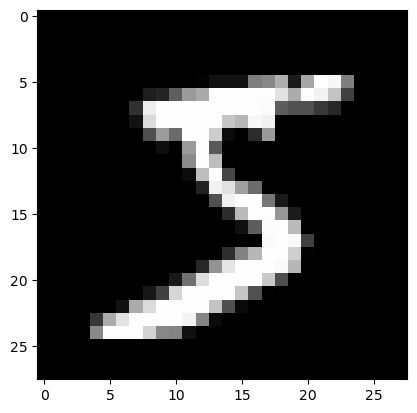

In [4]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap='gray')

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

2026-01-12 14:07:29.163925: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2026-01-12 14:07:29.164007: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2026-01-12 14:07:29.164027: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2026-01-12 14:07:29.164117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-12 14:07:29.164157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


2026-01-12 14:07:32.558642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7718 - loss: 0.7651 - val_accuracy: 0.9777 - val_loss: 0.0833
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9648 - loss: 0.1189 - val_accuracy: 0.9832 - val_loss: 0.0584
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9729 - loss: 0.0884 - val_accuracy: 0.9870 - val_loss: 0.0468
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9785 - loss: 0.0698 - val_accuracy: 0.9875 - val_loss: 0.0429
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9804 - loss: 0.0613 - val_accuracy: 0.9903 - val_loss: 0.0370
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9830 - loss: 0.0545 - val_accuracy: 0.9902 - val_loss: 0.0361
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9849 - loss: 0.0495 - val_accuracy: 0.9913 - val_loss: 0.0311
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9839 - loss: 0.0493 - val_accuracy: 0.991

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024686934426426888
Test accuracy: 0.991100013256073
